# XGBoost Advanced

## Feature Importance With XGBoost and Feature Selection

### Feature Importance in Gradient Boosting

#### A benefit of using gradient boosting is that after the boosted trees are constructed, it is relatively straightforward to retrieve importance scores for each attribute. Generally, importance provides a score that indicates how useful or valuable each feature was in the construction of the boosted decision trees within the model. The more an attribute is used to make key decisions with decision trees, the higher its relative importance.

[0.07468373 0.2694981  0.09356753 0.0902048  0.08288944 0.15198407
 0.1017815  0.13539082]


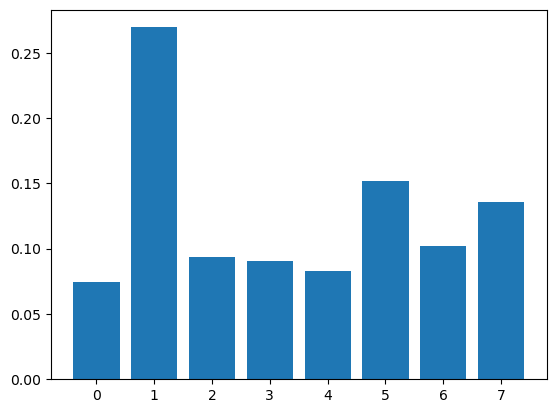

In [2]:
# plot feature importance manually
from numpy import loadtxt
from xgboost import XGBClassifier
from matplotlib import pyplot
# load data
dataset = loadtxt('data/diabetes.csv', delimiter=",")
# split data into X and y
X = dataset[:,0:8]
y = dataset[:,8]
# fit model on training data
model = XGBClassifier()
model.fit(X, y)
# feature importance
print(model.feature_importances_)
# plot
pyplot.bar(range(len(model.feature_importances_)), model.feature_importances_) 
pyplot.show()

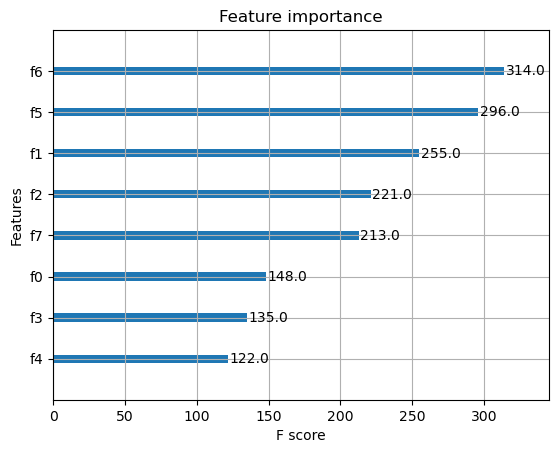

In [3]:

# plot feature importance using built-in function
from numpy import loadtxt
from xgboost import XGBClassifier
from xgboost import plot_importance

from matplotlib import pyplot
# load data
dataset = loadtxt('data/diabetes.csv', delimiter=",") # split data into X and y
X = dataset[:,0:8]
y = dataset[:,8]
# fit model on training data
model = XGBClassifier()
model.fit(X, y)
# plot feature importance
plot_importance(model)
pyplot.show()

## Feature Selection with XGBoost Feature Importance Scores

In [5]:
from numpy import loadtxt
from numpy import sort
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import SelectFromModel
# load data
dataset = loadtxt('data/diabetes.csv', delimiter=",")
# split data into X and y
X = dataset[:,0:8]
Y = dataset[:,8]
# split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=7) # fit model on all training data
model = XGBClassifier()
model.fit(X_train, y_train)
# make predictions for test data and evaluate
predictions = model.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))
# Fit model using each importance as a threshold
thresholds = sort(model.feature_importances_)
for thresh in thresholds:
  # select features using threshold
  selection = SelectFromModel(model, threshold=thresh, prefit=True)
  select_X_train = selection.transform(X_train)
  # train model
  selection_model = XGBClassifier()
  selection_model.fit(select_X_train, y_train)
# eval model
  select_X_test = selection.transform(X_test)
  predictions = selection_model.predict(select_X_test)
  accuracy = accuracy_score(y_test, predictions)
  print("Thresh=%.3f, n=%d, Accuracy: %.2f%%" % (thresh, select_X_train.shape[1],
      accuracy*100.0))

Accuracy: 72.83%
Thresh=0.074, n=8, Accuracy: 72.83%
Thresh=0.085, n=7, Accuracy: 70.87%
Thresh=0.095, n=6, Accuracy: 71.26%
Thresh=0.108, n=5, Accuracy: 68.11%
Thresh=0.112, n=4, Accuracy: 70.87%
Thresh=0.134, n=3, Accuracy: 72.83%
Thresh=0.147, n=2, Accuracy: 71.65%
Thresh=0.244, n=1, Accuracy: 67.32%


## Monitor Training Performance and Early Stopping

In [6]:

# monitor training performance
from numpy import loadtxt
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
# load data
dataset = loadtxt('data/diabetes.csv', delimiter=",")
# split data into X and y
X = dataset[:,0:8]
Y = dataset[:,8]
# split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=7) # fit model on training data
model = XGBClassifier()
eval_set = [(X_test, y_test)]
model.fit(X_train, y_train, eval_metric="error", eval_set=eval_set, verbose=True)
# make predictions for test data
predictions = model.predict(X_test)
# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

[0]	validation_0-error:0.26378
[1]	validation_0-error:0.27165
[2]	validation_0-error:0.24803
[3]	validation_0-error:0.24409
[4]	validation_0-error:0.23622
[5]	validation_0-error:0.20079
[6]	validation_0-error:0.21260
[7]	validation_0-error:0.20472
[8]	validation_0-error:0.21260
[9]	validation_0-error:0.20079
[10]	validation_0-error:0.21654
[11]	validation_0-error:0.20866
[12]	validation_0-error:0.22835
[13]	validation_0-error:0.22835
[14]	validation_0-error:0.22047
[15]	validation_0-error:0.21654
[16]	validation_0-error:0.22441
[17]	validation_0-error:0.22441
[18]	validation_0-error:0.23622
[19]	validation_0-error:0.23622
[20]	validation_0-error:0.23228
[21]	validation_0-error:0.24016
[22]	validation_0-error:0.24409
[23]	validation_0-error:0.24803
[24]	validation_0-error:0.25591
[25]	validation_0-error:0.24803
[26]	validation_0-error:0.24803
[27]	validation_0-error:0.24409
[28]	validation_0-error:0.24803
[29]	validation_0-error:0.24409
[30]	validation_0-error:0.25984
[31]	validation_0-

/Users/test/miniforge3/envs/machine-learning-env/lib/python3.8/site-packages/xgboost/sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


## Evaluate XGBoost Models With Learning Curves

[0]	validation_0-error:0.22763	validation_0-logloss:0.52061	validation_1-error:0.26378	validation_1-logloss:0.57274
[1]	validation_0-error:0.17121	validation_0-logloss:0.44678	validation_1-error:0.27165	validation_1-logloss:0.53462
[2]	validation_0-error:0.14397	validation_0-logloss:0.39816	validation_1-error:0.24803	validation_1-logloss:0.50815
[3]	validation_0-error:0.11284	validation_0-logloss:0.35458	validation_1-error:0.24409	validation_1-logloss:0.49274
[4]	validation_0-error:0.09144	validation_0-logloss:0.32583	validation_1-error:0.23622	validation_1-logloss:0.48162
[5]	validation_0-error:0.07393	validation_0-logloss:0.29454	validation_1-error:0.20079	validation_1-logloss:0.48037
[6]	validation_0-error:0.06809	validation_0-logloss:0.27536	validation_1-error:0.21260	validation_1-logloss:0.48404
[7]	validation_0-error:0.06226	validation_0-logloss:0.25573	validation_1-error:0.20472	validation_1-logloss:0.48366
[8]	validation_0-error:0.06420	validation_0-logloss:0.24207	validation_1

/Users/test/miniforge3/envs/machine-learning-env/lib/python3.8/site-packages/xgboost/sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


Accuracy: 72.83%


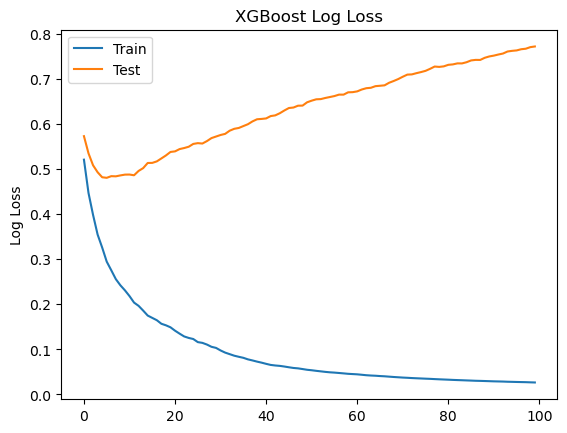

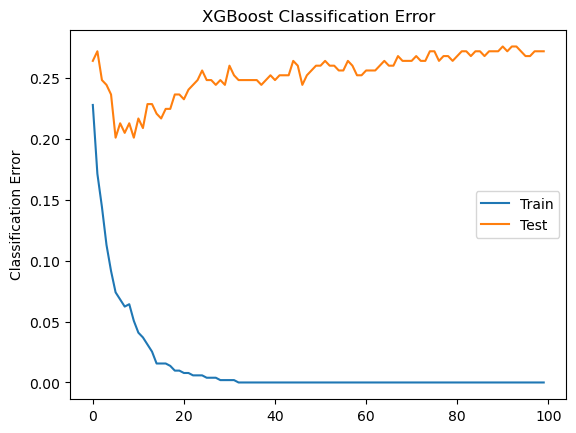

In [7]:
# plot learning curve
from numpy import loadtxt
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from matplotlib import pyplot
# load data
dataset = loadtxt('data/diabetes.csv', delimiter=",")
# split data into X and y
X = dataset[:,0:8]
Y = dataset[:,8]
# split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=7) # fit model on training data
model = XGBClassifier()
eval_set = [(X_train, y_train), (X_test, y_test)]
model.fit(X_train, y_train, eval_metric=["error", "logloss"], eval_set=eval_set,
    verbose=True)
# make predictions for test data
predictions = model.predict(X_test)
# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))
# retrieve performance metrics
results = model.evals_result()
epochs = len(results['validation_0']['error']) 
x_axis = range(0, epochs)
# plot log loss
fig, ax = pyplot.subplots()
ax.plot(x_axis, results['validation_0']['logloss'], label='Train') 
ax.plot(x_axis, results['validation_1']['logloss'], label='Test') 
ax.legend()
pyplot.ylabel('Log Loss')
pyplot.title('XGBoost Log Loss')
pyplot.show()
# plot classification error
fig, ax = pyplot.subplots()
ax.plot(x_axis, results['validation_0']['error'], label='Train') 
ax.plot(x_axis, results['validation_1']['error'], label='Test') 
ax.legend()
pyplot.ylabel('Classification Error') 
pyplot.title('XGBoost Classification Error') 
pyplot.show()

## Early Stopping With XGBoost